# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Loading the data

In [2]:
df=pd.read_csv(r'C:\Users\91882\Downloads\laptop-price-predictor-regression-project-main\laptop_data.csv')

In [3]:
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


# Shape of data

In [4]:
df.shape

(1303, 12)

# Information of data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


from this we can say that there is no null values


# Checking for duplicates

In [6]:
df.duplicated().any()

False

No duplicated values


# Droping Unnamed column

In [7]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [8]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


# Preprocessing-Handling categorical columns

# 1]RAM, Weight  columns

In [9]:
df['Ram']=df['Ram'].str.replace('GB','')
df['Weight']=df['Weight'].str.replace('kg','')

In [10]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


# Changing dtype of RAM and Weight columns

In [11]:
df['Ram']=df['Ram'].astype('int32')
df['Weight']=df['Weight'].astype('float32')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
dtypes: float32(1), float64(2), int32(1), object(7)
memory usage: 101.9+ KB


# 2]Screenresolution

In [13]:
temp=df['ScreenResolution'].str.split('x',expand=True)

In [14]:
df['Y_Res']=temp[1]

In [15]:
temp[0]

0               IPS Panel Retina Display 2560
1                                        1440
2                                Full HD 1920
3               IPS Panel Retina Display 2880
4               IPS Panel Retina Display 2560
                        ...                  
1298     IPS Panel Full HD / Touchscreen 1920
1299    IPS Panel Quad HD+ / Touchscreen 3200
1300                                     1366
1301                                     1366
1302                                     1366
Name: 0, Length: 1303, dtype: object

In [16]:
#no we can aply for temp[0]
#using regex
df['X_res']=temp[0].str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])

In [17]:
df['X_res']

0       2560
1       1440
2       1920
3       2880
4       2560
        ... 
1298    1920
1299    3200
1300    1366
1301    1366
1302    1366
Name: X_res, Length: 1303, dtype: object

In [18]:
#changing their type to int
df['X_res']=df['X_res'].astype('int32')
df['Y_Res']=df['Y_Res'].astype('int32')

# Checking coorelation with price

In [19]:
df.corr()['Price']

Inches    0.068197
Ram       0.743007
Weight    0.210370
Price     1.000000
Y_Res     0.552809
X_res     0.556529
Name: Price, dtype: float64

# Feature Engineering

In [20]:
df['PPI']=((((df['X_res']**2)+(df['Y_Res']**2))**0.5)/df['Inches']).astype('float32')

In [21]:
df.corr()['Price']

Inches    0.068197
Ram       0.743007
Weight    0.210370
Price     1.000000
Y_Res     0.552809
X_res     0.556529
PPI       0.473487
Name: Price, dtype: float64

# EDA

# 1]Univariate analysis

# Price column

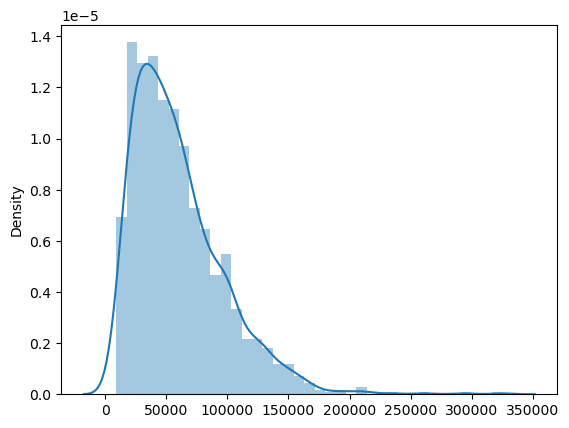

In [22]:
sns.distplot(x=df['Price'])
plt.show()

data is skewed-left

# Company column

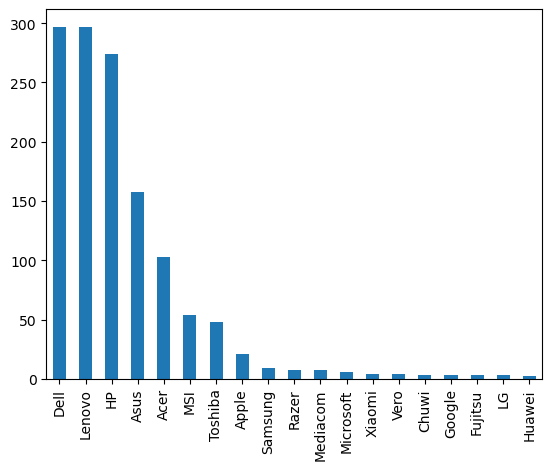

In [23]:
df['Company'].value_counts().plot(kind='bar')
plt.show()

The most product are in brand list of DELL,Lenovo,HP,Asus

# Type Name

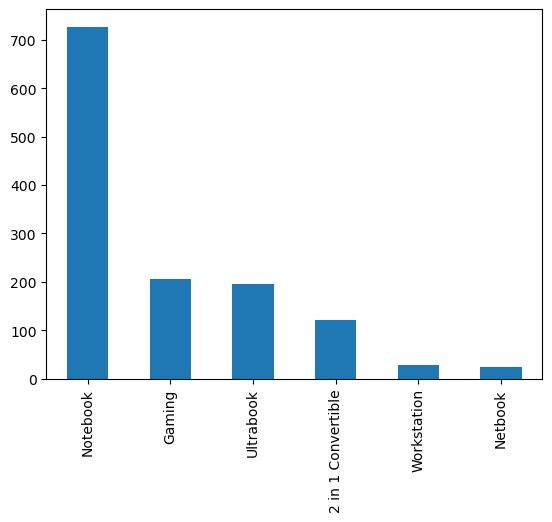

In [24]:
df['TypeName'].value_counts().plot(kind='bar')
plt.show()

Note book is highly prefered type

# Inches

<AxesSubplot:xlabel='Inches', ylabel='Density'>

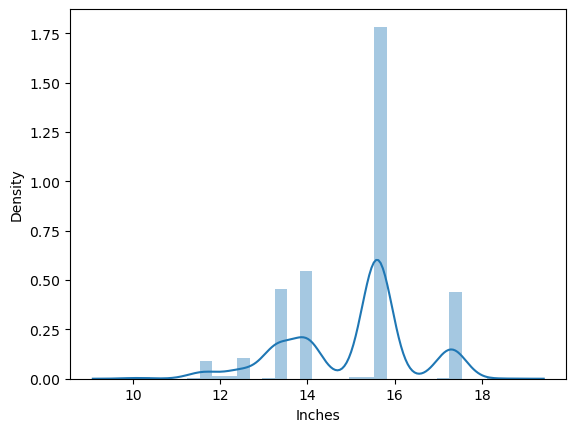

In [25]:
sns.distplot(df['Inches'])

15.5 - 16 inch is prefered most

# ---------------ScreenResolution column-------------------------

# Screen resolution count

In [26]:
df['ScreenResolution'].value_counts()

Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440               

# Lets see how much touch screen and not touchscreen

In [27]:
df['TouchScreen']=df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)

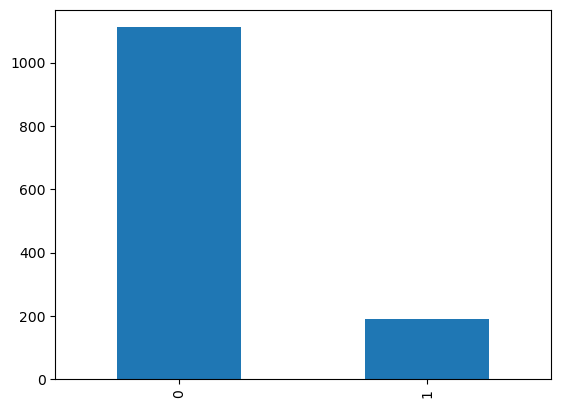

In [28]:
df['TouchScreen'].value_counts().plot(kind='bar')
plt.show()

# Lets see how much IPS panel

In [29]:
df['IPS']=df['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)

<AxesSubplot:>

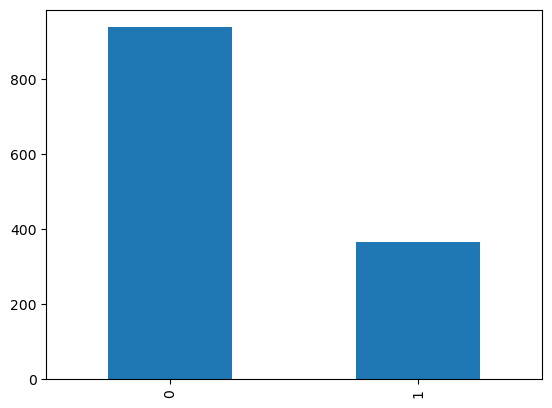

In [30]:
df['IPS'].value_counts().plot(kind='bar')

# ------------------CPU column-----------------------

In [31]:
df['Cpu'].value_counts()

Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: Cpu, Length: 118, dtype: int64

In [32]:
df['Cpu'].unique()

array(['Intel Core i5 2.3GHz', 'Intel Core i5 1.8GHz',
       'Intel Core i5 7200U 2.5GHz', 'Intel Core i7 2.7GHz',
       'Intel Core i5 3.1GHz', 'AMD A9-Series 9420 3GHz',
       'Intel Core i7 2.2GHz', 'Intel Core i7 8550U 1.8GHz',
       'Intel Core i5 8250U 1.6GHz', 'Intel Core i3 6006U 2GHz',
       'Intel Core i7 2.8GHz', 'Intel Core M m3 1.2GHz',
       'Intel Core i7 7500U 2.7GHz', 'Intel Core i7 2.9GHz',
       'Intel Core i3 7100U 2.4GHz', 'Intel Atom x5-Z8350 1.44GHz',
       'Intel Core i5 7300HQ 2.5GHz', 'AMD E-Series E2-9000e 1.5GHz',
       'Intel Core i5 1.6GHz', 'Intel Core i7 8650U 1.9GHz',
       'Intel Atom x5-Z8300 1.44GHz', 'AMD E-Series E2-6110 1.5GHz',
       'AMD A6-Series 9220 2.5GHz',
       'Intel Celeron Dual Core N3350 1.1GHz',
       'Intel Core i3 7130U 2.7GHz', 'Intel Core i7 7700HQ 2.8GHz',
       'Intel Core i5 2.0GHz', 'AMD Ryzen 1700 3GHz',
       'Intel Pentium Quad Core N4200 1.1GHz',
       'Intel Atom x5-Z8550 1.44GHz',
       'Intel Celeron Du

In [33]:
df['Cpu_Name']=df['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))

In [34]:
#Preprocessing
def Cpu(text):
    if text=='Intel Core i5' or text=='Intel Core i7' or text=='Intel Core i3':
        return text
    else:
        if text.split()[0]=='Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD processor'

In [35]:
df['Cpu_brand']=df['Cpu_Name'].apply(Cpu)

In [36]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Y_Res,X_res,PPI,TouchScreen,IPS,Cpu_Name,Cpu_brand
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,1600,2560,226.983002,0,1,Intel Core i5,Intel Core i5
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,900,1440,127.677940,0,0,Intel Core i5,Intel Core i5
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,1080,1920,141.212006,0,0,Intel Core i5,Intel Core i5
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,1800,2880,220.534622,0,1,Intel Core i7,Intel Core i7
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,1600,2560,226.983002,0,1,Intel Core i5,Intel Core i5


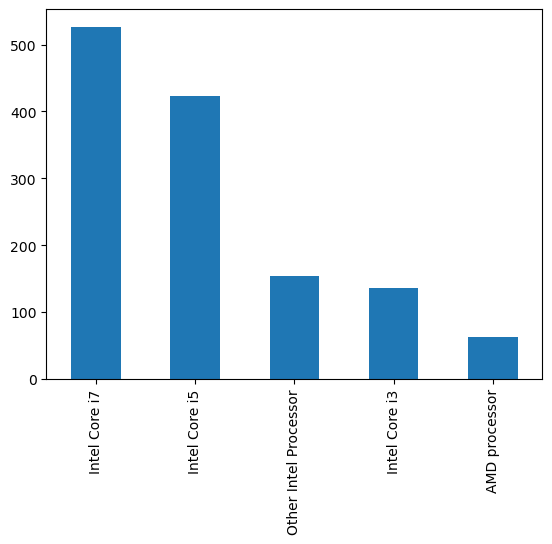

In [37]:
df['Cpu_brand'].value_counts().plot(kind='bar')
plt.show()

i7 i5 are most prefered brands

# RAM column

<AxesSubplot:>

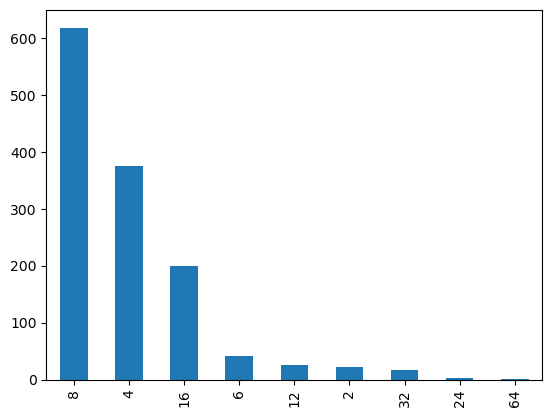

In [38]:
df['Ram'].value_counts().plot(kind='bar')

8GB and 4GB are more popular others are very very less

# --------------Processing Feature extraction--------------------

# ---------Memory column-----------------

In [39]:
df['Memory'].value_counts()

256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD             1
5

In [40]:
#to replace .0 in the string
df['Memory']=df['Memory'].str.replace(r'\.0','')
#GB with empty
df['Memory']=df['Memory'].str.replace('GB','')
#TB with 000
df['Memory']=df['Memory'].str.replace('TB','000')

In [41]:
df['Memory'].value_counts()

256 SSD                         412
1000 HDD                        224
500 HDD                         132
512 SSD                         118
128 SSD +  1000 HDD              94
128 SSD                          76
256 SSD +  1000 HDD              73
32 Flash Storage                 38
2000 HDD                         16
64 Flash Storage                 15
512 SSD +  1000 HDD              14
1000 SSD                         14
256 SSD +  2000 HDD              10
1000 Hybrid                       9
256 Flash Storage                 8
16 Flash Storage                  7
32 SSD                            6
180 SSD                           5
128 Flash Storage                 4
512 SSD +  2000 HDD               3
16 SSD                            3
512 Flash Storage                 2
1000 SSD +  1000 HDD              2
256 SSD +  500 HDD                2
128 SSD +  2000 HDD               2
256 SSD +  256 SSD                2
512 SSD +  256 SSD                1
512 SSD +  512 SSD          

In [42]:
#spliting string +
new=df['Memory'].str.split('+',n=1,expand=True)

In [43]:
df['first']=new[0]
df['first']=df['first'].str.strip()

In [44]:
df['second']=new[1]

In [45]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Y_Res,X_res,PPI,TouchScreen,IPS,Cpu_Name,Cpu_brand,first,second
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,1600,2560,226.983002,0,1,Intel Core i5,Intel Core i5,128 SSD,None
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,900,1440,127.677940,0,0,Intel Core i5,Intel Core i5,128 Flash Storage,None
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,1080,1920,141.212006,0,0,Intel Core i5,Intel Core i5,256 SSD,None
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,1800,2880,220.534622,0,1,Intel Core i7,Intel Core i7,512 SSD,None
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,1600,2560,226.983002,0,1,Intel Core i5,Intel Core i5,256 SSD,None


In [46]:
#first column
#segregate SSD ,HDD, HYBRID,flashstorage

#HDD
df['Layer1HDD']=df['first'].apply(lambda x:1 if 'HDD' in x else 0)
#SSD
df['Layer1SDD']=df['first'].apply(lambda x:1 if 'SSD' in x else 0)
#hybrid
df['Layer1Hybrid']=df['first'].apply(lambda x:1 if 'Hybrid' in x else 0)
#flashstorage
df['Layer1_Flash_storage']=df['first'].apply(lambda x:1 if 'Flash Storage' in x else 0)


In [47]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,...,TouchScreen,IPS,Cpu_Name,Cpu_brand,first,second,Layer1HDD,Layer1SDD,Layer1Hybrid,Layer1_Flash_storage
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,...,0,1,Intel Core i5,Intel Core i5,128 SSD,None,0,1,0,0
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,...,0,0,Intel Core i5,Intel Core i5,128 Flash Storage,None,0,0,0,1
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256 SSD,Intel HD Graphics 620,No OS,1.86,...,0,0,Intel Core i5,Intel Core i5,256 SSD,None,0,1,0,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,...,0,1,Intel Core i7,Intel Core i7,512 SSD,None,0,1,0,0
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,...,0,1,Intel Core i5,Intel Core i5,256 SSD,None,0,1,0,0


In [48]:
#second column
#segregate SSD ,HDD, HYBRID,flashstorage

#filling none with 0 in column named second
df['second'].fillna('0',inplace=True)

#HDD
df['Layer2HDD']=df['second'].apply(lambda x:1 if 'HDD' in x else 0)
#SSD
df['Layer2SDD']=df['second'].apply(lambda x:1 if 'SSD' in x else 0)
#hybrid
df['Layer2Hybrid']=df['second'].apply(lambda x:1 if 'Hybrid' in x else 0)
#flashstorage
df['Layer2_Flash_storage']=df['second'].apply(lambda x:1 if 'Flash Storage' in x else 0)

In [49]:
#to take only number from string
df['first']=df['first'].str.replace(r'\D','')
df['second']=df['second'].str.replace(r'\D','')

In [50]:
#converting type to int
df['first']=df['first'].astype(int)
df['second']=df['second'].astype(int)

In [51]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,...,first,second,Layer1HDD,Layer1SDD,Layer1Hybrid,Layer1_Flash_storage,Layer2HDD,Layer2SDD,Layer2Hybrid,Layer2_Flash_storage
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,...,128,0,0,1,0,0,0,0,0,0
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,...,128,0,0,0,0,1,0,0,0,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256 SSD,Intel HD Graphics 620,No OS,1.86,...,256,0,0,1,0,0,0,0,0,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,...,512,0,0,1,0,0,0,0,0,0
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,...,256,0,0,1,0,0,0,0,0,0


In [52]:
df['HDD']=(df['first']*df['Layer1HDD'])+(df['second']*df['Layer2HDD'])
df['SDD']=(df['first']*df['Layer1SDD'])+(df['second']*df['Layer2SDD'])
df['Hybrid']=(df['first']*df['Layer1Hybrid'])+(df['second']*df['Layer2Hybrid'])
df['FlashStorage']=(df['first']*df['Layer1_Flash_storage'])+(df['second']*df['Layer2_Flash_storage'])

In [53]:
df.columns

Index(['Company', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu', 'Ram',
       'Memory', 'Gpu', 'OpSys', 'Weight', 'Price', 'Y_Res', 'X_res', 'PPI',
       'TouchScreen', 'IPS', 'Cpu_Name', 'Cpu_brand', 'first', 'second',
       'Layer1HDD', 'Layer1SDD', 'Layer1Hybrid', 'Layer1_Flash_storage',
       'Layer2HDD', 'Layer2SDD', 'Layer2Hybrid', 'Layer2_Flash_storage', 'HDD',
       'SDD', 'Hybrid', 'FlashStorage'],
      dtype='object')

In [54]:
df.drop(['first', 'second','Layer1HDD', 'Layer1SDD', 'Layer1Hybrid', 'Layer1_Flash_storage',
       'Layer2HDD', 'Layer2SDD', 'Layer2Hybrid', 'Layer2_Flash_storage'],axis=1,inplace=True)

In [55]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,...,X_res,PPI,TouchScreen,IPS,Cpu_Name,Cpu_brand,HDD,SDD,Hybrid,FlashStorage
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,...,2560,226.983002,0,1,Intel Core i5,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,...,1440,127.677940,0,0,Intel Core i5,Intel Core i5,0,0,0,128
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256 SSD,Intel HD Graphics 620,No OS,1.86,...,1920,141.212006,0,0,Intel Core i5,Intel Core i5,0,256,0,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,...,2880,220.534622,0,1,Intel Core i7,Intel Core i7,0,512,0,0
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,...,2560,226.983002,0,1,Intel Core i5,Intel Core i5,0,256,0,0


In [56]:
df.drop(['Memory'],axis=1,inplace=True)

In [57]:
df.corr()['Price']

Inches          0.068197
Ram             0.743007
Weight          0.210370
Price           1.000000
Y_Res           0.552809
X_res           0.556529
PPI             0.473487
TouchScreen     0.191226
IPS             0.252208
HDD            -0.096441
SDD             0.670799
Hybrid          0.007989
FlashStorage   -0.040511
Name: Price, dtype: float64

Hybrid and Flash storage has week correlation with price 

hence we can drop since it not affect the price range

here HDD is also negative corelated but like SDD HDD also consider by users so keep as it

In [58]:
df.drop(['Hybrid','FlashStorage'],axis=1,inplace=True)

In [59]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Gpu,OpSys,Weight,Price,Y_Res,X_res,PPI,TouchScreen,IPS,Cpu_Name,Cpu_brand,HDD,SDD
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,1600,2560,226.983002,0,1,Intel Core i5,Intel Core i5,0,128
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,900,1440,127.677940,0,0,Intel Core i5,Intel Core i5,0,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,Intel HD Graphics 620,No OS,1.86,30636.0000,1080,1920,141.212006,0,0,Intel Core i5,Intel Core i5,0,256
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,1800,2880,220.534622,0,1,Intel Core i7,Intel Core i7,0,512
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,1600,2560,226.983002,0,1,Intel Core i5,Intel Core i5,0,256


# -------------GPU column---------------

In [60]:
df['Gpu'].value_counts()

Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: Gpu, Length: 110, dtype: int64

In [61]:
df['Gpu'].unique()

array(['Intel Iris Plus Graphics 640', 'Intel HD Graphics 6000',
       'Intel HD Graphics 620', 'AMD Radeon Pro 455',
       'Intel Iris Plus Graphics 650', 'AMD Radeon R5',
       'Intel Iris Pro Graphics', 'Nvidia GeForce MX150',
       'Intel UHD Graphics 620', 'Intel HD Graphics 520',
       'AMD Radeon Pro 555', 'AMD Radeon R5 M430',
       'Intel HD Graphics 615', 'AMD Radeon Pro 560',
       'Nvidia GeForce 940MX', 'Intel HD Graphics 400',
       'Nvidia GeForce GTX 1050', 'AMD Radeon R2', 'AMD Radeon 530',
       'Nvidia GeForce 930MX', 'Intel HD Graphics',
       'Intel HD Graphics 500', 'Nvidia GeForce 930MX ',
       'Nvidia GeForce GTX 1060', 'Nvidia GeForce 150MX',
       'Intel Iris Graphics 540', 'AMD Radeon RX 580',
       'Nvidia GeForce 920MX', 'AMD Radeon R4 Graphics', 'AMD Radeon 520',
       'Nvidia GeForce GTX 1070', 'Nvidia GeForce GTX 1050 Ti',
       'Nvidia GeForce MX130', 'AMD R4 Graphics',
       'Nvidia GeForce GTX 940MX', 'AMD Radeon RX 560',
       'Nvid

In [62]:
#segregating Gpu based on brands
#intel,amd,nivdia
df['Gpu Brand']=df['Gpu'].apply(lambda x:x.split()[0])

In [63]:
df['Gpu Brand'].value_counts()

Intel     722
Nvidia    400
AMD       180
ARM         1
Name: Gpu Brand, dtype: int64

In [64]:
df=df[df['Gpu Brand']!='ARM']

<AxesSubplot:>

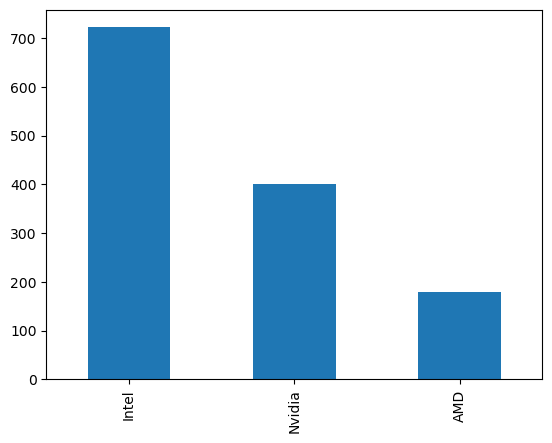

In [65]:
df['Gpu Brand'].value_counts().plot(kind='bar')

In [66]:
df.drop(['Gpu'],axis=1,inplace=True)

# Operating system

<AxesSubplot:>

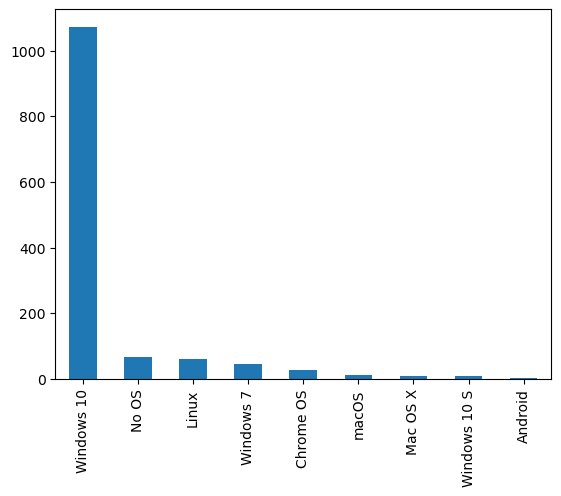

In [67]:
df['OpSys'].value_counts().plot(kind='bar')

In [68]:
def op(text):
    if text=='Windows 10' or text=='Windows 10 S' or text=='Windows 7':
        return 'Windows'
    elif text=='macOS' or text=='Mac OS X':
        return 'Mac'
    else:
        return 'others/Linux/No OS'

In [69]:
df['os']=df['OpSys'].apply(op)

<AxesSubplot:>

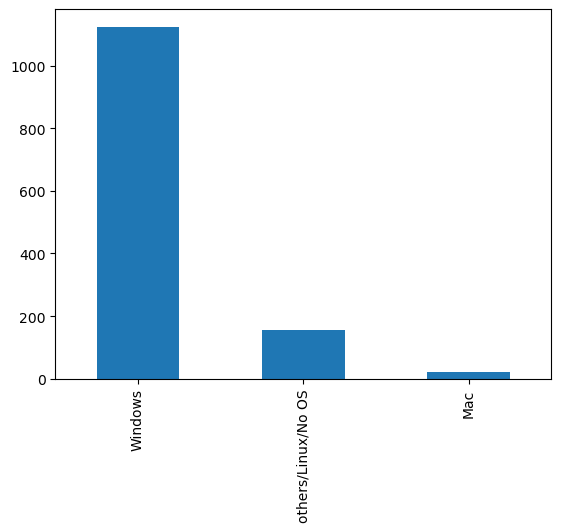

In [70]:
df['os'].value_counts().plot(kind='bar')

since windows is more selling product it may be of price range

In [71]:
df.drop(['OpSys'],axis=1,inplace=True)

In [72]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Weight,Price,Y_Res,X_res,PPI,TouchScreen,IPS,Cpu_Name,Cpu_brand,HDD,SDD,Gpu Brand,os
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,1.37,71378.6832,1600,2560,226.983002,0,1,Intel Core i5,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,1.34,47895.5232,900,1440,127.677940,0,0,Intel Core i5,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,1.86,30636.0000,1080,1920,141.212006,0,0,Intel Core i5,Intel Core i5,0,256,Intel,others/Linux/No OS
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,1.83,135195.3360,1800,2880,220.534622,0,1,Intel Core i7,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,1.37,96095.8080,1600,2560,226.983002,0,1,Intel Core i5,Intel Core i5,0,256,Intel,Mac


# Weight column

<AxesSubplot:ylabel='Density'>

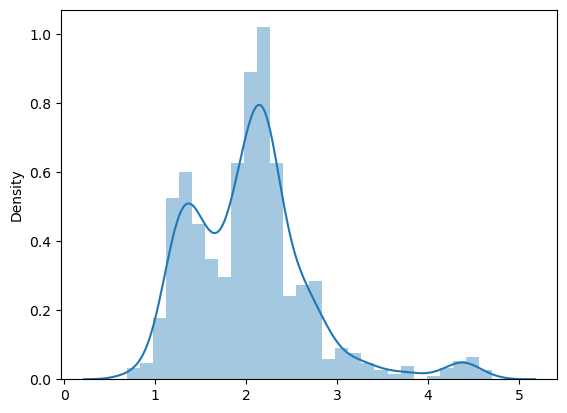

In [73]:
sns.distplot(x=df['Weight'])

# Bivariate analysis

# Company vs price

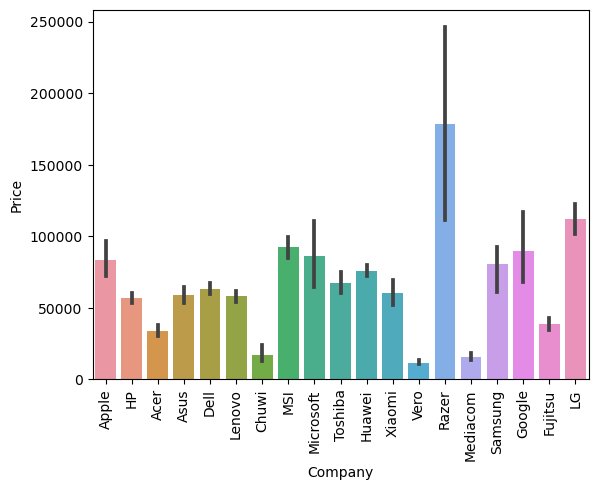

In [74]:
sns.barplot(x=df['Company'],y=df['Price'])
plt.xticks(rotation=90)
plt.show()

ASus HP Lenovo Dell has price range with in 70000

since there has several other factor might atract the users to buy these brands

# Type Name vs Price

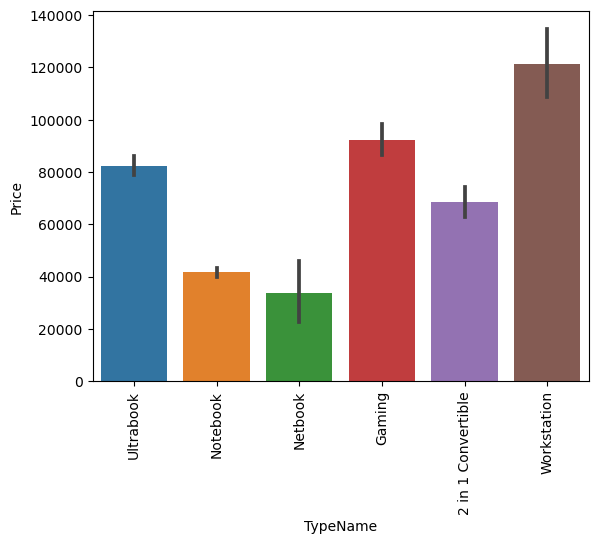

In [75]:
sns.barplot(x=df['TypeName'],y=df['Price'])
plt.xticks(rotation=90)
plt.show()

# Inches vs price

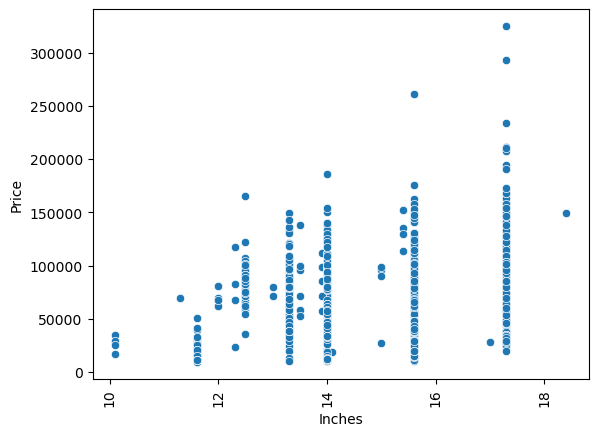

In [76]:
sns.scatterplot(x=df['Inches'],y=df['Price'])
plt.xticks(rotation=90)
plt.show()

between 14 to 16 price is almost similar

it has relationship but not strong

# TouchScreen vs price

<AxesSubplot:xlabel='TouchScreen', ylabel='Price'>

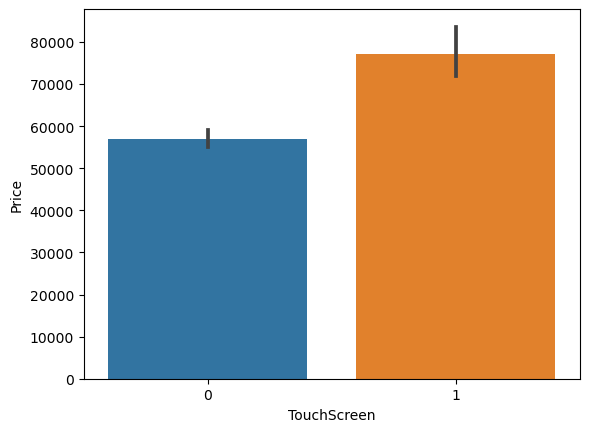

In [77]:
sns.barplot(x=df['TouchScreen'],y=df['Price'])

non-Touch screen price is within 60000

# IPS vs Price

<AxesSubplot:xlabel='IPS', ylabel='Price'>

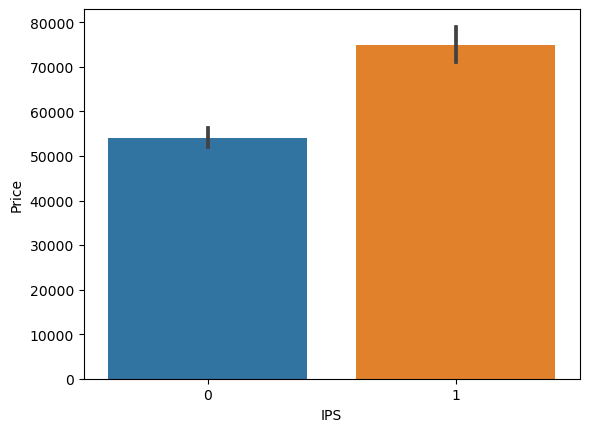

In [78]:
sns.barplot(x=df['IPS'],y=df['Price'])

# we can drop X_res Y_Res and Screen resolution

In [79]:
df.columns

Index(['Company', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu', 'Ram',
       'Weight', 'Price', 'Y_Res', 'X_res', 'PPI', 'TouchScreen', 'IPS',
       'Cpu_Name', 'Cpu_brand', 'HDD', 'SDD', 'Gpu Brand', 'os'],
      dtype='object')

In [80]:
df.drop(['ScreenResolution','Y_Res','X_res'],axis=1,inplace=True)

# CPU brand vs price

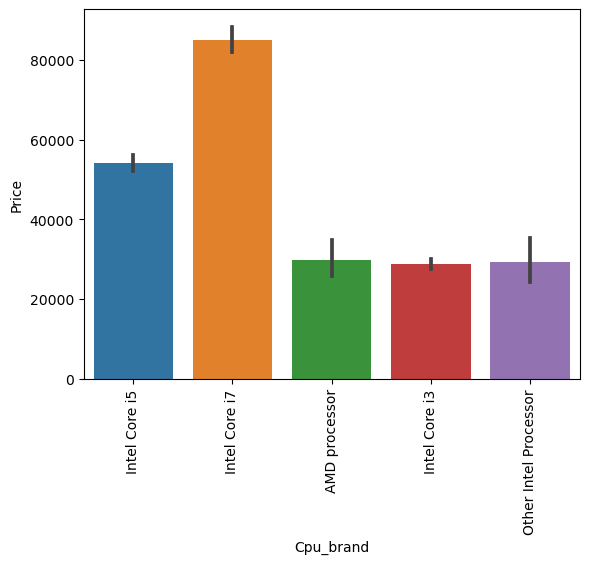

In [81]:
sns.barplot(x=df['Cpu_brand'],y=df['Price'])
plt.xticks(rotation=90)
plt.show()

In [82]:
df.columns

Index(['Company', 'TypeName', 'Inches', 'Cpu', 'Ram', 'Weight', 'Price', 'PPI',
       'TouchScreen', 'IPS', 'Cpu_Name', 'Cpu_brand', 'HDD', 'SDD',
       'Gpu Brand', 'os'],
      dtype='object')

In [83]:
#dropping cpu and cpu name
df.drop(['Cpu_Name','Cpu'],axis=1,inplace=True)

# RAM vs price

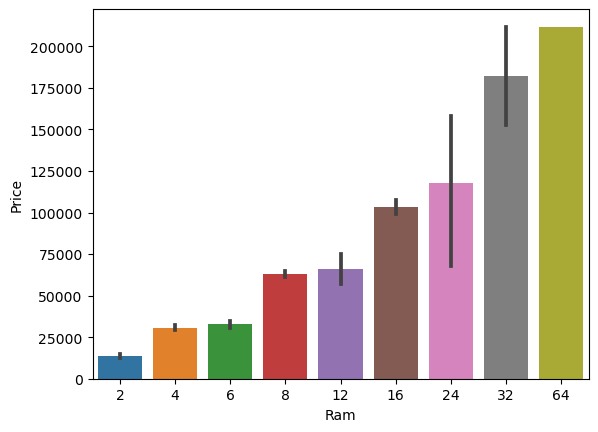

In [84]:
sns.barplot(x=df['Ram'],y=df['Price'])
plt.show()

linear correlation

# GPU brand vs Price

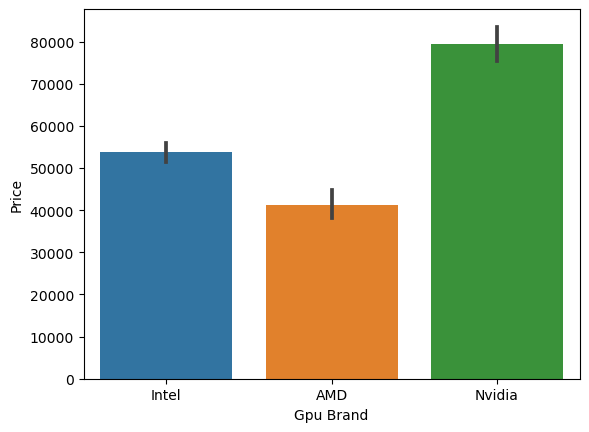

In [85]:
sns.barplot(x=df['Gpu Brand'],y=df['Price'])
plt.show()

# OS vs Price

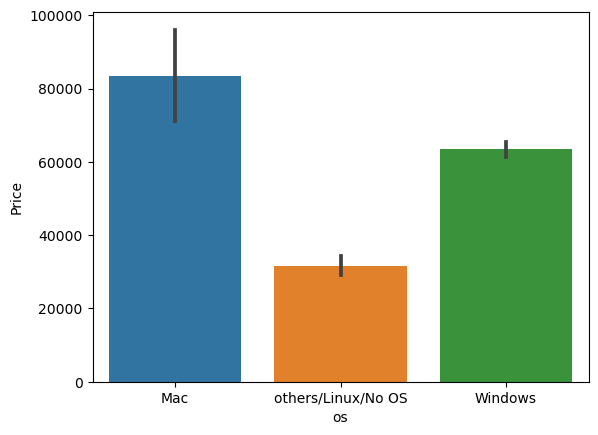

In [86]:
sns.barplot(x=df['os'],y=df['Price'])
plt.show()

# Weight vs price

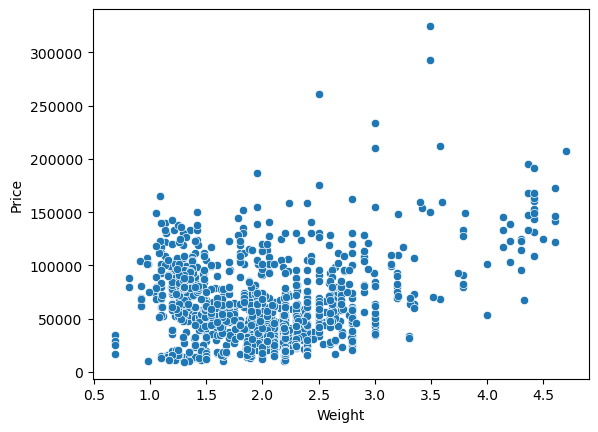

In [87]:
sns.scatterplot(x=df['Weight'],y=df['Price'])
plt.show()

In [88]:
df.drop(['Inches'],axis=1,inplace=True)

# Correlation

<AxesSubplot:>

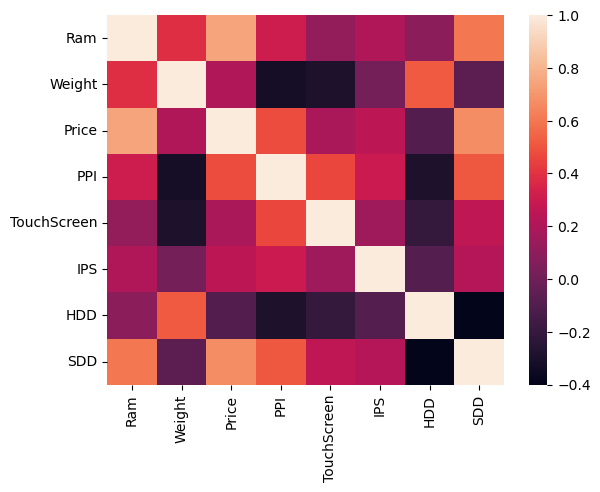

In [89]:
sns.heatmap(df.corr())

# Handling skew data -Target column

<AxesSubplot:ylabel='Density'>

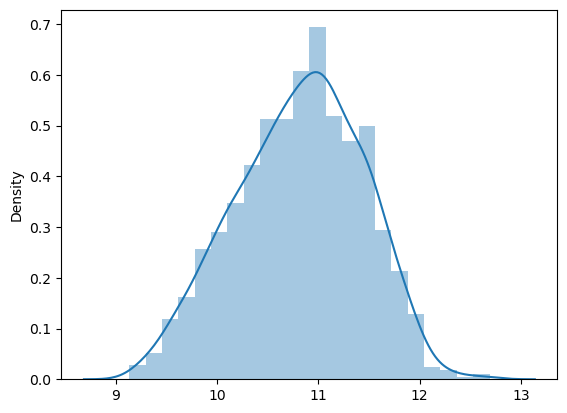

In [90]:
sns.distplot(x=np.log(df['Price']))

In [91]:
df.columns

Index(['Company', 'TypeName', 'Ram', 'Weight', 'Price', 'PPI', 'TouchScreen',
       'IPS', 'Cpu_brand', 'HDD', 'SDD', 'Gpu Brand', 'os'],
      dtype='object')

In [92]:
df=df[['Company', 'TypeName', 'Ram', 'Weight', 'Price','TouchScreen',
       'IPS', 'PPI','Cpu_brand', 'HDD', 'SDD', 'Gpu Brand', 'os']]

In [93]:
#spliting dependent and independent column
X=df.drop(['Price'],axis=1)
Y=np.log(df['Price'])

In [94]:
X

,Company,TypeName,Ram,Weight,TouchScreen,IPS,PPI,Cpu_brand,HDD,SDD,Gpu Brand,os
0,Apple,Ultrabook,8,1.37,0,1,226.983002,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,0,0,141.212006,Intel Core i5,0,256,Intel,others/Linux/No OS
3,Apple,Ultrabook,16,1.83,0,1,220.534622,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,0,1,226.983002,Intel Core i5,0,256,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,1.80,1,1,157.350510,Intel Core i7,0,128,Intel,Windows
1299,Lenovo,2 in 1 Convertible,16,1.30,1,1,276.053528,Intel Core i7,0,512,Intel,Windows
1300,Lenovo,Notebook,2,1.50,0,0,111.935204,Other Intel Processor,0,0,Intel,Windows
1301,HP,Notebook,6,2.19,0,0,100.454666,Intel Core i7,1000,0,AMD,Windows


In [95]:
Y

0       11.175755
1       10.776777
2       10.329931
3       11.814476
4       11.473101
          ...    
1298    10.433899
1299    11.288115
1300     9.409283
1301    10.614129
1302     9.886358
Name: Price, Length: 1302, dtype: float64

# Spliting Training and Testing data 

In [96]:
from sklearn.model_selection import train_test_split

In [97]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.15,random_state=2)

In [98]:
x_train

,Company,TypeName,Ram,Weight,TouchScreen,IPS,PPI,Cpu_brand,HDD,SDD,Gpu Brand,os
183,Toshiba,Notebook,8,2.00,0,0,100.454666,Intel Core i5,0,128,Intel,Windows
1141,MSI,Gaming,8,2.40,0,0,141.212006,Intel Core i7,1000,128,Nvidia,Windows
1049,Asus,Netbook,4,1.20,0,0,135.094208,Other Intel Processor,0,0,Intel,others/Linux/No OS
1020,Dell,2 in 1 Convertible,4,2.08,1,1,141.212006,Intel Core i3,1000,0,Intel,Windows
878,Dell,Notebook,4,2.18,0,0,141.212006,Intel Core i5,1000,128,Nvidia,Windows
...,...,...,...,...,...,...,...,...,...,...,...,...
466,Acer,Notebook,4,2.20,0,0,100.454666,Intel Core i3,500,0,Nvidia,Windows
299,Asus,Ultrabook,16,1.63,0,0,141.212006,Intel Core i7,0,512,Nvidia,Windows
493,Acer,Notebook,8,2.20,0,0,100.454666,AMD processor,1000,0,AMD,Windows
527,Lenovo,Notebook,8,2.20,0,0,100.454666,Intel Core i3,2000,0,Nvidia,others/Linux/No OS


In [99]:
y_train

183     10.651384
1141    11.016798
1049     9.638174
1020    10.655148
878     10.791749
          ...    
466     10.126164
299     11.267217
493     10.336864
527     10.104611
1193    11.034319
Name: Price, Length: 1106, dtype: float64

# Column transformer and Pipeline

In [100]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error

In [101]:
#importing all ML-Algo
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

In [102]:
#building column transformer
step1=ColumnTransformer(transformers=[
    ('col_inf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

# 1.Linear Regression

In [103]:
step2=LinearRegression()
#building pipeline
pipe=Pipeline([
    ('step1',step1),
    ('step2',step2)
])
pipe.fit(x_train,y_train)
y_pred=pipe.predict(x_test)
print('r2 score',r2_score(y_test,y_pred))
print('MASE',mean_absolute_error(y_test,y_pred))

r2 score 0.8073277435583988
MASE 0.21017828080372658


# 2.Ridge regression

In [104]:
rid_reg=Ridge(alpha=10)
pipe_rid=Pipeline([
    ('step1',step1),
    ('step2',rid_reg)
])
pipe_rid.fit(x_train,y_train)
y_pred_rid=pipe_rid.predict(x_test)
print('r2 score',r2_score(y_test,y_pred_rid))
print('MASE',mean_absolute_error(y_test,y_pred_rid))

r2 score 0.8127331017700294
MASE 0.2092680232409918


# 3.Lasso Regression

In [105]:
las_reg=Lasso(alpha=0.001)
pipe_las=Pipeline([
    ('step1',step1),
    ('step2',las_reg)
])
pipe_las.fit(x_train,y_train)
y_pred_las=pipe_las.predict(x_test)
print('r2 score',r2_score(y_test,y_pred_las))
print('MASE',mean_absolute_error(y_test,y_pred_las))

r2 score 0.8071854495985412
MASE 0.21114357356022664


# 4.KNN

In [106]:
knn_reg=KNeighborsRegressor()
pipe_knn=Pipeline([
    ('step1',step1),
    ('step2',knn_reg)
])
pipe_knn.fit(x_train,y_train)
y_pred_knn=pipe_knn.predict(x_test)
print('r2 score',r2_score(y_test,y_pred_knn))
print('MASE',mean_absolute_error(y_test,y_pred_knn))

r2 score 0.8021965448099826
MASE 0.199716871754322


# 5.Decision Tree Regressor

In [107]:
desc_reg=DecisionTreeRegressor(max_depth=8)
pipe_desc=Pipeline([
    ('step1',step1),
    ('step2',desc_reg)
])
pipe_desc.fit(x_train,y_train)
y_pred_desc=pipe_desc.predict(x_test)
print('r2 score',r2_score(y_test,y_pred_desc))
print('MASE',mean_absolute_error(y_test,y_pred_desc))

r2 score 0.8433264473635941
MASE 0.18163966711556287


# 6.Random Forest Regressor

In [108]:
ran_reg=RandomForestRegressor(n_estimators=100,
                             random_state=3,
                             max_samples=0.5,
                             max_features=0.75,
                             max_depth=15)
pipe_ran=Pipeline([
    ('step1',step1),
    ('step2',ran_reg)
])
pipe_ran.fit(x_train,y_train)
y_pred_ran=pipe_ran.predict(x_test)
print('r2 score',r2_score(y_test,y_pred_ran))
print('MASE',mean_absolute_error(y_test,y_pred_ran))

r2 score 0.8852126535925404
MASE 0.16047750866393973


# 7.Extra Trees Regressor

In [109]:
ex_reg=ExtraTreesRegressor(n_estimators=100,
                             random_state=3,
                             max_features=0.75,
                             max_depth=15)
pipe_ex=Pipeline([
    ('step1',step1),
    ('step2',ex_reg)
])
pipe_ex.fit(x_train,y_train)
y_pred_ex=pipe_ex.predict(x_test)
print('r2 score',r2_score(y_test,y_pred_ex))
print('MASE',mean_absolute_error(y_test,y_pred_ex))

r2 score 0.8740851115367623
MASE 0.16124521870862188


# 8.Ada Boost Regressor

In [110]:
ada_reg=AdaBoostRegressor(n_estimators=15,
                             learning_rate=1.0)
pipe_ada=Pipeline([
    ('step1',step1),
    ('step2',ada_reg)
])
pipe_ada.fit(x_train,y_train)
y_pred_ada=pipe_ada.predict(x_test)
print('r2 score',r2_score(y_test,y_pred_ada))
print('MASE',mean_absolute_error(y_test,y_pred_ada))

r2 score 0.7930206600587231
MASE 0.23042511756656706


# 9.Gradient Boost Regressor

In [111]:
gr_reg=GradientBoostingRegressor(n_estimators=500)
pipe_gr=Pipeline([
    ('step1',step1),
    ('step2',gr_reg)
])
pipe_gr.fit(x_train,y_train)
y_pred_gr=pipe_gr.predict(x_test)
print('r2 score',r2_score(y_test,y_pred_gr))
print('MASE',mean_absolute_error(y_test,y_pred_gr))

r2 score 0.8827879146936185
MASE 0.15925526393140363


# 10.SVM-SVR

In [112]:
sv_reg=SVR(kernel='rbf',C=10000,epsilon=0.1)
pipe_sv=Pipeline([
    ('step1',step1),
    ('step2',sv_reg)
])
pipe_sv.fit(x_train,y_train)
y_pred_sv=pipe_sv.predict(x_test)
print('r2 score',r2_score(y_test,y_pred_sv))
print('MASE',mean_absolute_error(y_test,y_pred_sv))

r2 score 0.8090031875919587
MASE 0.2021434919871425


# 11.XgBoost

In [113]:
xg_reg=XGBRegressor(n_estimators=45,
                   max_depth=5,
                   learning_rate=0.5)
pipe_xg=Pipeline([
    ('step1',step1),
    ('step2',xg_reg)
])
pipe_xg.fit(x_train,y_train)
y_pred_xg=pipe_xg.predict(x_test)
print('r2 score',r2_score(y_test,y_pred_xg))
print('MASE',mean_absolute_error(y_test,y_pred_xg))

r2 score 0.8811773435850243
MASE 0.16496203512600974


# Hyper parameter tuning for RandomForest

# GridSearchCV

In [114]:
from sklearn.model_selection import GridSearchCV

# for RandomForest

In [115]:
#defining model
random=RandomForestRegressor()

# Define the grid of hyperparameters to search over
param_grid = {'n_estimators': [50,100, 150],
              'random_state':[3,4,5],
              'max_depth': [10,15,20],
              'max_features': [0.50, 0.75,1.0],
              'max_samples': [0.5, 0.75, 1.0]}


# Create the Grid Search object

grid_search = GridSearchCV(estimator=random, param_grid=param_grid, cv=5,n_jobs=-1)

In [116]:
pipe_search=Pipeline([
    ('step1',step1),
    ('step2',grid_search)
])
pipe_search.fit(x_train, y_train)

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('col_inf',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  [0, 1, 7, 10, 11])])),
                ('step2',
                 GridSearchCV(cv=5, estimator=RandomForestRegressor(),
                              n_jobs=-1,
                              param_grid={'max_depth': [10, 15, 20],
                                          'max_features': [0.5, 0.75, 1.0],
                                          'max_samples': [0.5, 0.75, 1.0],
                                          'n_estimators': [50, 100, 150],
                                          'random_state': [3, 4, 5]}))])

In [122]:
# Print the best hyperparameters and the corresponding score
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Hyperparameters: {'max_depth': 20, 'max_features': 0.5, 'max_samples': 1.0, 'n_estimators': 150, 'random_state': 4}
Best Score: 0.8771897385945733


# RandomizedSearchCv

In [128]:
from sklearn.model_selection import RandomizedSearchCV

In [166]:
rff = RandomForestRegressor()

# Define the grid of hyperparameters to search over
param_dist = {'n_estimators': [2,3,4,5,6,7,8,9,10,25,30,35,50,75,100, 150,500,1000,2000],
              'random_state':[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18],
              'max_depth': [2,3,5,7,8,9,10,11,12,13,14,15,16,20,22,23,24],
              'max_features': [0.10,0.15,0.20,0.25,0.30,0.35,0.40,0.45,0.50,0.55,0.60,0.65,0.70,0.75,0.80,0.85,1.0],
              'max_samples': [0.1,0.2,0.25,0.3,0.35,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,1.0]
             }

# Define the randomized search with cross-validation
random_search = RandomizedSearchCV(
    rff,
    param_distributions=param_dist,
    n_iter=100,
    cv=5,
    scoring="neg_mean_absolute_error",
    n_jobs=-1,
)
pipe_rf=Pipeline([
    ('step1',step1),
    ('step2',random_search)
])

# Fit the randomized search to the data
pipe_rf.fit(x_train, y_train)

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('col_inf',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  [0, 1, 7, 10, 11])])),
                ('step2',
                 RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                                    n_iter=100, n_jobs=-1,
                                    param_distributions={'max_depth': [2, 3, 5,
                                                                       7, 8, 9,
                                                                       10, 11,
                                                                       12, 13,
                                                                       14, 15,
                                                                       16, 20,
                                                                       22, 23,
                                                                       24],
                                                         'max_features': [0.1,
                                                                          0.15,
                                                                          0.2,
                                                                          0.25,
                                                                          0.3,
                                                                          0.35,
                                                                          0.4,
                                                                          0.45,
                                                                          0.5,
                                                                          0.55,
                                                                          0.6,
                                                                          0.65,
                                                                          0.7,
                                                                          0.75,
                                                                          0.8,
                                                                          0.85,
                                                                          1.0],
                                                         'max_samples': [0.1,
                                                                         0.2,
                                                                         0.25,
                                                                         0.3,
                                                                         0.35,
                                                                         0.5,
                                                                         0.55,
                                                                         0.6,
                                                                         0.65,
                                                                         0.7,
                                                                         0.75,
                                                                         0.8,
                                                                         0.85,
                                                                         0.9,
                                                                         0.95,
                                                                         1.0],
                                                         'n_estimators': [2, 3,
                                                                          4, 5,
                                                              

In [167]:
# Print the best hyperparameters and the corresponding score
print("Best Hyperparameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)

Best Hyperparameters: {'random_state': 13, 'n_estimators': 1000, 'max_samples': 1.0, 'max_features': 0.7, 'max_depth': 24}
Best Score: -0.1636755224931307


In [180]:
random_regression=RandomForestRegressor(random_state= 13, 
                              n_estimators=1000,
                              max_samples= 1.0, 
                              max_features=0.7,
                              max_depth=24)
pipe_random=Pipeline([
    ('step1',step1),
    ('step2',random_regression)
])
pipe_random.fit(x_train,y_train)
y_pred_random=pipe_random.predict(x_test)
print('r2 score',r2_score(y_test,y_pred_random))
print('MASE',mean_absolute_error(y_test,y_pred_random))

r2 score 0.8911410423654473
MASE 0.1532138091963358


Note:There is very small change in score

# Saving the model

In [181]:
import pickle

In [183]:
pickle.dump(df,open('data_lap.pkl','wb'))

In [184]:
pickle.dump(pipe_random,open('pipe.pkl','wb'))

In [187]:
df

,Company,TypeName,Ram,Weight,Price,TouchScreen,IPS,PPI,Cpu_brand,HDD,SDD,Gpu Brand,os
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,226.983002,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,30636.0000,0,0,141.212006,Intel Core i5,0,256,Intel,others/Linux/No OS
3,Apple,Ultrabook,16,1.83,135195.3360,0,1,220.534622,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,96095.8080,0,1,226.983002,Intel Core i5,0,256,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,1.80,33992.6400,1,1,157.350510,Intel Core i7,0,128,Intel,Windows
1299,Lenovo,2 in 1 Convertible,16,1.30,79866.7200,1,1,276.053528,Intel Core i7,0,512,Intel,Windows
1300,Lenovo,Notebook,2,1.50,12201.1200,0,0,111.935204,Other Intel Processor,0,0,Intel,Windows
1301,HP,Notebook,6,2.19,40705.9200,0,0,100.454666,Intel Core i7,1000,0,AMD,Windows


In [188]:
x_train

,Company,TypeName,Ram,Weight,TouchScreen,IPS,PPI,Cpu_brand,HDD,SDD,Gpu Brand,os
183,Toshiba,Notebook,8,2.00,0,0,100.454666,Intel Core i5,0,128,Intel,Windows
1141,MSI,Gaming,8,2.40,0,0,141.212006,Intel Core i7,1000,128,Nvidia,Windows
1049,Asus,Netbook,4,1.20,0,0,135.094208,Other Intel Processor,0,0,Intel,others/Linux/No OS
1020,Dell,2 in 1 Convertible,4,2.08,1,1,141.212006,Intel Core i3,1000,0,Intel,Windows
878,Dell,Notebook,4,2.18,0,0,141.212006,Intel Core i5,1000,128,Nvidia,Windows
...,...,...,...,...,...,...,...,...,...,...,...,...
466,Acer,Notebook,4,2.20,0,0,100.454666,Intel Core i3,500,0,Nvidia,Windows
299,Asus,Ultrabook,16,1.63,0,0,141.212006,Intel Core i7,0,512,Nvidia,Windows
493,Acer,Notebook,8,2.20,0,0,100.454666,AMD processor,1000,0,AMD,Windows
527,Lenovo,Notebook,8,2.20,0,0,100.454666,Intel Core i3,2000,0,Nvidia,others/Linux/No OS


In [189]:
x_train.columns

Index(['Company', 'TypeName', 'Ram', 'Weight', 'TouchScreen', 'IPS', 'PPI',
       'Cpu_brand', 'HDD', 'SDD', 'Gpu Brand', 'os'],
      dtype='object')